<a href="https://colab.research.google.com/github/SBrouck/smoking-effects-on-medical-charges/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Upload and import the dataset
from google.colab import files
import pandas as pd
import io

uploaded = files.upload()
insurance_df = pd.read_csv(io.BytesIO(uploaded['insurance.csv']))

# Quick check
print("Shape:", insurance_df.shape)
print(insurance_df.head())

Saving insurance.csv to insurance.csv
Shape: (1338, 7)
   age     sex     bmi  children       smoker     region      charges
0   19  female  27.900         0      smoking  southwest  16884.92400
1   18    male  33.770         1  non-smoking  southeast   1725.55230
2   28    male  33.000         3  non-smoking  southeast   4449.46200
3   33    male  22.705         0  non-smoking  northwest  21984.47061
4   32    male  28.880         0  non-smoking  northwest   3866.85520


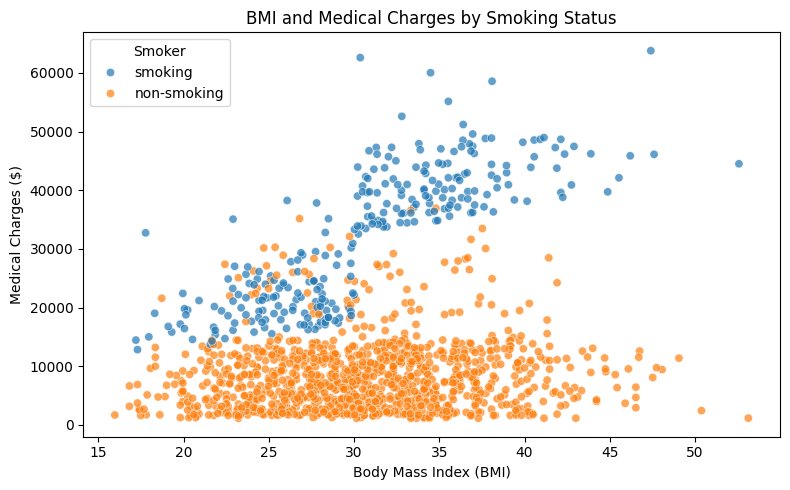

In [2]:
# Q1. BMI vs. Medical Charges (colored by smoker)
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(8,5))
sns.scatterplot(
    data=insurance_df,
    x="bmi",
    y="charges",
    hue="smoker",
    alpha=0.7
)

plt.title("BMI and Medical Charges by Smoking Status")
plt.xlabel("Body Mass Index (BMI)")
plt.ylabel("Medical Charges ($)")
plt.legend(title="Smoker")
plt.tight_layout()
plt.show()

The scatter plot shows a clear pattern: smokers consistently incur higher medical charges than non-smokers across all BMI levels. Among non-smokers, costs rise moderately with BMI but remain relatively contained. In contrast, for smokers, charges increase steeply as BMI rises, with many extreme cases exceeding 40,000 or even 60,000$. This indicates that smoking not only raises baseline health costs but also amplifies the financial impact of obesity. The spread of charges is also much wider for smokers, especially at higher BMI, reflecting greater variability and risk in their medical expenses. From an insurance or policy perspective, this highlights smokers with high BMI as the most expensive and unpredictable group, underlining the need for targeted prevention and risk-based pricing strategies.

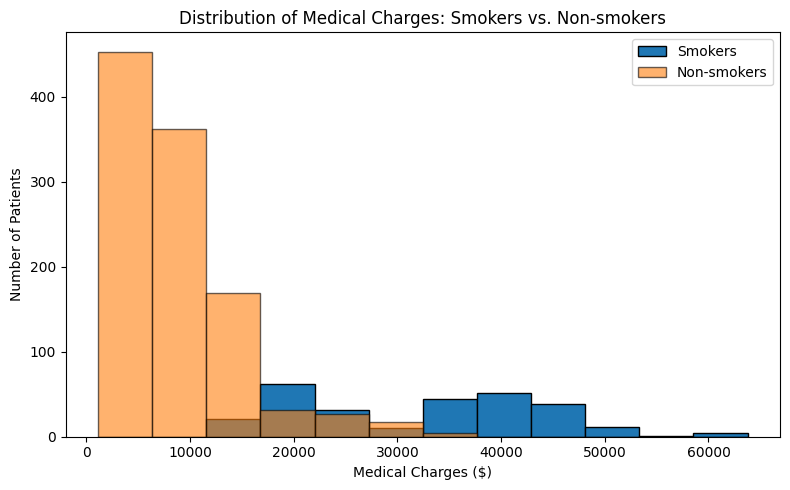

In [8]:
# Q2. Distribution of medical charges

import numpy as np
from matplotlib import pyplot as plt

# Split smokers and non-smokers
smoker_charges = insurance_df.loc[insurance_df["smoker"].isin(["smoking", "yes"]), "charges"]
non_smoker_charges = insurance_df.loc[insurance_df["smoker"].isin(["non-smoking", "no"]), "charges"]

# Define 12 equal-width bins across the range of charges
bins = np.linspace(insurance_df["charges"].min(), insurance_df["charges"].max(), 13)

plt.figure(figsize=(8,5))

# Step 1: plot smokers' distribution
plt.hist(smoker_charges, bins=bins, label="Smokers", edgecolor="black")

# Step 2: plot non-smokers' distribution on the same figure with alpha=0.6
plt.hist(non_smoker_charges, bins=bins, alpha=0.6, label="Non-smokers", edgecolor="black")

plt.title("Distribution of Medical Charges: Smokers vs. Non-smokers")
plt.xlabel("Medical Charges ($)")
plt.ylabel("Number of Patients")
plt.legend()
plt.tight_layout()
plt.show()

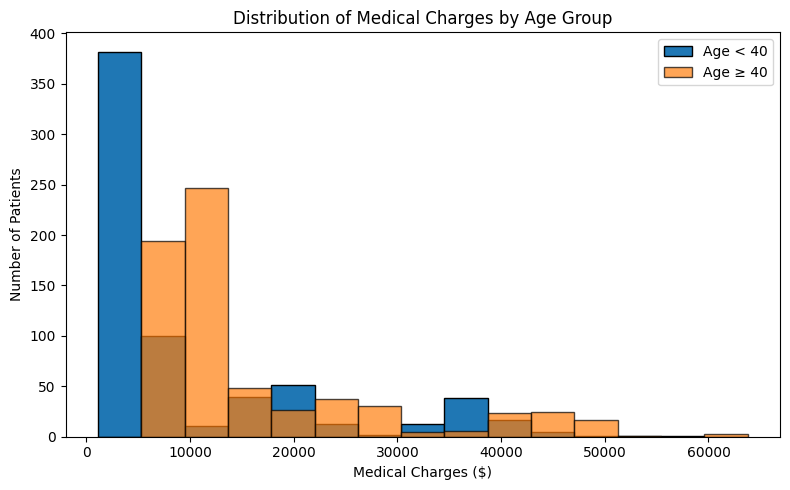

In [9]:
# Q3. Distribution of charges: younger than 40 vs. 40 and older

import numpy as np
from matplotlib import pyplot as plt

# Split data
young_charges = insurance_df.loc[insurance_df["age"] < 40, "charges"]
elder_charges = insurance_df.loc[insurance_df["age"] >= 40, "charges"]

# Define 15 bins across the range
bins = np.linspace(insurance_df["charges"].min(), insurance_df["charges"].max(), 16)

plt.figure(figsize=(8,5))

# Step 1: histogram for patients <40
plt.hist(young_charges, bins=bins, label="Age < 40", edgecolor="black")

# Step 2: overlay histogram for patients >=40
plt.hist(elder_charges, bins=bins, alpha=0.7, label="Age ≥ 40", edgecolor="black")

plt.title("Distribution of Medical Charges by Age Group")
plt.xlabel("Medical Charges ($)")
plt.ylabel("Number of Patients")
plt.legend()
plt.tight_layout()
plt.show()

Q3 - Interpretation

The figure compares the distribution of medical charges between patients younger than 40 and those aged 40 or above. We can see that younger patients (<40) mostly cluster in the lower cost ranges, with a sharp concentration below 10,000, and only a few cases incurring higher charges. In contrast, older patients (≥40) show a broader distribution, with noticeably more individuals facing medium to very high medical expenses, including costs beyond $30,000. This suggests that age is indeed an important factor: while younger individuals typically face lower and less variable medical costs, older individuals are more likely to experience higher and more dispersed charges. From a business perspective, this highlights the increased financial risk associated with older patients, which insurers must account for in pricing and risk models.

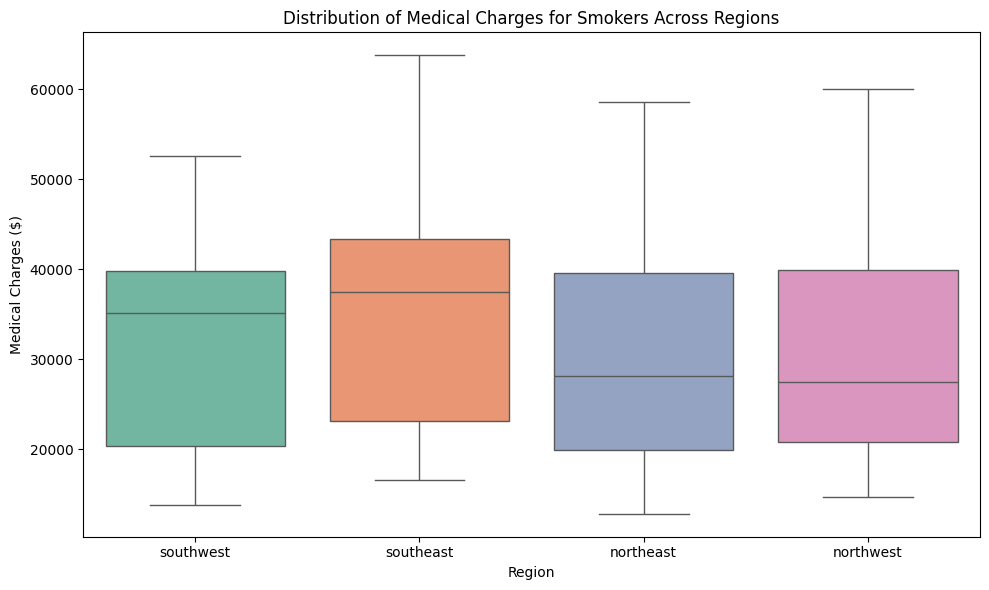

In [11]:
# Q4: Boxplots of medical charges for smokers across regions

# Filter dataset to only smokers
smokers_df = insurance_df[insurance_df['smoker'] == 'smoking']

# Create side-by-side boxplots
plt.figure(figsize=(10,6))
sns.boxplot(data=smokers_df, x="region", y="charges", hue="region", palette="Set2", legend=False)

plt.title("Distribution of Medical Charges for Smokers Across Regions")
plt.xlabel("Region")
plt.ylabel("Medical Charges ($)")

plt.tight_layout()
plt.show()

The boxplots show how medical charges for smokers vary across the four regions. In all regions, the distribution is wide, with several extreme outliers reflecting patients with very high medical costs. However, we observe differences in median values: smokers in the southeast have the highest median medical charges, followed by those in the southwest. In contrast, smokers in the northeast and northwest generally face somewhat lower median costs. This suggests that regional differences, possibly linked to lifestyle, healthcare access, or socioeconomic factors, play a role in medical expenditures among smokers, with the southeast standing out as the costliest region for this group.

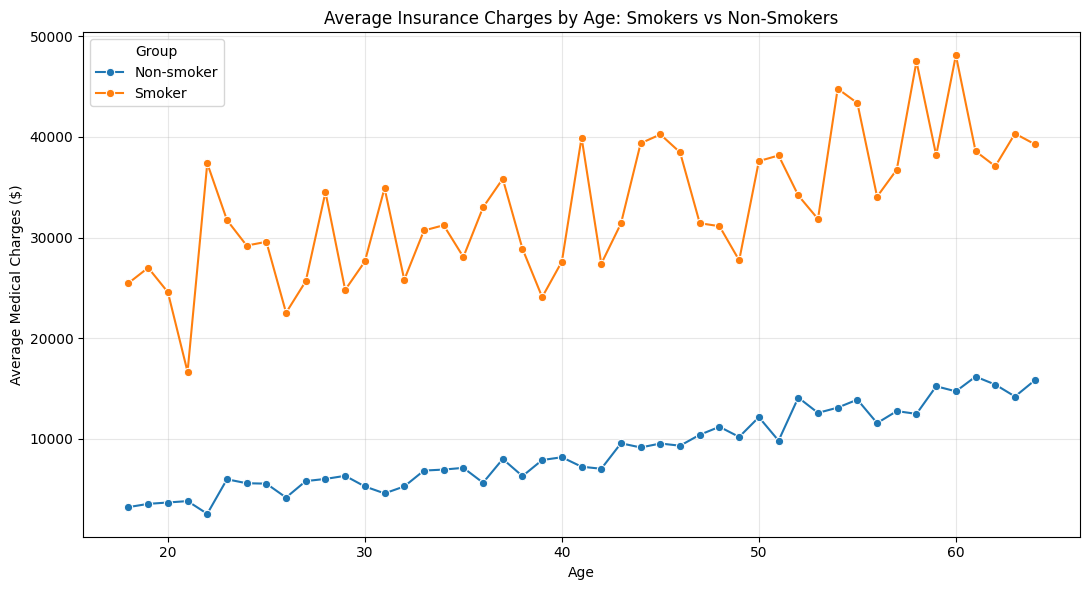

smoker_std
Non-smoker    47
Smoker        47
Name: count, dtype: int64


In [15]:
# Q5. Average charges by age for smokers vs non-smokers (two lines, robust to label variants)

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# 1) We standardize smoker labels so both "smoking/non-smoking" and "yes/no" work.
map_smoker = {
    "smoking": "Smoker", "yes": "Smoker", "YES": "Smoker", 1: "Smoker", True: "Smoker",
    "non-smoking": "Non-smoker", "no": "Non-smoker", "NO": "Non-smoker", 0: "Non-smoker", False: "Non-smoker"
}
tmp = insurance_df.copy()
tmp["smoker_std"] = tmp["smoker"].map(map_smoker).fillna(tmp["smoker"].astype(str))

# 2) We compute the age-wise averages.
avg_by_age = (
    tmp.groupby(["age", "smoker_std"], as_index=False)["charges"]
       .mean()
       .sort_values(["smoker_std", "age"])
)

# 3) We plot two clean lines.
plt.figure(figsize=(11,6))
sns.lineplot(data=avg_by_age, x="age", y="charges", hue="smoker_std", marker="o")
plt.title("Average Insurance Charges by Age: Smokers vs Non-Smokers")
plt.xlabel("Age")
plt.ylabel("Average Medical Charges ($)")
plt.legend(title="Group")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# quick sanity check so we know both groups are present
print(avg_by_age["smoker_std"].value_counts())

The line chart highlights a stark contrast in medical charges between smokers and non-smokers across different ages.

For non-smokers, the relationship between age and costs is relatively stable, with a gradual and predictable increase over time. This reflects the natural progression of healthcare needs as individuals get older.

In contrast, smokers consistently exhibit substantially higher charges, on average three to four times greater, demonstrating the strong influence of smoking on medical expenditures.

Moreover, the smoker curve is not only steeper but also marked by large fluctuations, suggesting the occurrence of costly, unpredictable health shocks such as cancer or cardiovascular events.

These findings underscore that while age is a determinant of medical costs, smoking is by far the dominant driver of both elevated and volatile expenditures. This has direct implications for insurance risk management, as it justifies higher premiums for smokers and highlights the potential economic benefits of smoking prevention initiatives.